# Project - 2020 Ford Bike trip Data (Lyft)

# Investigation Overview

This investigation is done to communicate the data findings of some interesting patterns found during analysis of data of Ford bike data set. The goal is to find the hidden patterns which are difficult to catch by looking at csv data but is more clear when done analysis and used visualizations.

# Data Set Overview

The dataset used for this exploratory analysis consists of monthly individual trip data from year 2020 in CSV format covering the greater San Francisco Bay area, raw data is available here. The attributes contains ride_id, trip start and end time, etc. Visualizations below are created from wrangled and cleaned data to facilitate exploration analysis and help discover usage pattern and rider characteristics.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statistics 
import datetime
from scipy import stats

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("final_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239969 entries, 0 to 239968
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             239969 non-null  object 
 1   started_at          239969 non-null  object 
 2   ended_at            239969 non-null  object 
 3   start_station_name  239969 non-null  object 
 4   start_station_id    239969 non-null  float64
 5   end_station_name    194551 non-null  object 
 6   end_station_id      194551 non-null  float64
 7   user_type           239969 non-null  object 
 8   bike_type           239969 non-null  object 
 9   month               239969 non-null  object 
 10  day                 239969 non-null  int64  
 11  hour                239969 non-null  int64  
 12  week                239969 non-null  object 
 13  duration            239969 non-null  float64
 14  distance            239327 non-null  float64
dtypes: float64(4), int64(2), object(9)

In [4]:
# functions to fix types

def change_to_category(df,types):
    for x in types:
        df[x] = df[x].astype('category')
    return df
    
def change_to_str(df, types):
    for x in types:
        df[x].astype('str')
        return df

In [5]:
# Fix types

df['started_at'] = df['started_at'].astype('datetime64[ns]')
df['ended_at'] = df['ended_at'].astype('datetime64[ns]')
df['month'] = df['started_at'].dt.month
df['day'] = df['started_at'].dt.day
df['hour'] = df['started_at'].dt.hour
df['week'] = df['started_at'].dt.strftime('%A')
df['month'] = pd.to_datetime(df['month'], format='%m').dt.month_name().str.slice(stop=3)

df = change_to_category(df,['bike_type', 'user_type'])

In [6]:
# calculating % split for the user type
customer = df.query('user_type == "casual"')['ride_id'].count()
subscriber = df.query('user_type == "member"')['ride_id'].count()

customer_proportion = customer / df['ride_id'].count()
subscriber_proportion = subscriber / df['ride_id'].count()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239969 entries, 0 to 239968
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             239969 non-null  object        
 1   started_at          239969 non-null  datetime64[ns]
 2   ended_at            239969 non-null  datetime64[ns]
 3   start_station_name  239969 non-null  object        
 4   start_station_id    239969 non-null  float64       
 5   end_station_name    194551 non-null  object        
 6   end_station_id      194551 non-null  float64       
 7   user_type           239969 non-null  category      
 8   bike_type           239969 non-null  category      
 9   month               239969 non-null  object        
 10  day                 239969 non-null  int64         
 11  hour                239969 non-null  int64         
 12  week                239969 non-null  object        
 13  duration            239969 no

# User Types and Monthly Usage

Casuals contributed the majority of the bike usage in 2020, about 59.4%, while about 40.6% were consumed by members. Both subscribers and customers ride the most during the summer months with subscribers peaked in June. The usage clearly dsiplays the impact of covid 19 on the company.

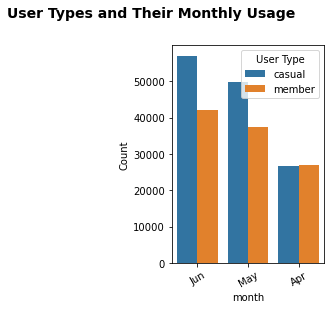

In [8]:
plt.subplot(1, 2, 2);
ax = sns.countplot(data=df, x='month', hue='user_type', hue_order=(df.user_type.value_counts()/df.shape[0]).index);
ax.legend(title='User Type');
plt.xticks(rotation=30);
plt.ylabel('Count');
plt.suptitle('User Types and Their Monthly Usage', fontsize=14, fontweight='semibold', y=1.015);

# Average Weekday Trip Duration for Customers and Subscribers
Members ride much shorter/quicker trips compared to casuals on each day of the week. Both user types had an obvious increase of trip duration on thursday and mondays, especially casual customers. Subscriber usage was more efficient than customers overall and maintained a pretty consistent average duration Monday through Friday.

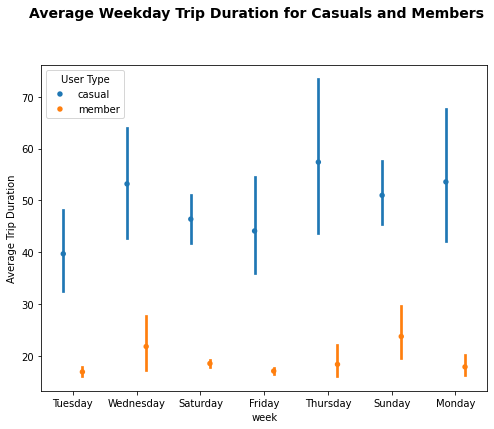

In [9]:
plt.figure(figsize=[8, 6]);
ax = sns.pointplot(data=df, x='week', y='duration', hue='user_type', dodge=0.3, markers='.', linestyles="", hue_order=(df.user_type.value_counts()/df.shape[0]).index);
ax.legend(title='User Type');
plt.ylabel('Average Trip Duration');
plt.suptitle('Average Weekday Trip Duration for Casuals and Members', fontsize=14, fontweight='semibold', y=1.015);

# Daily/weekly usage of bike types and user types

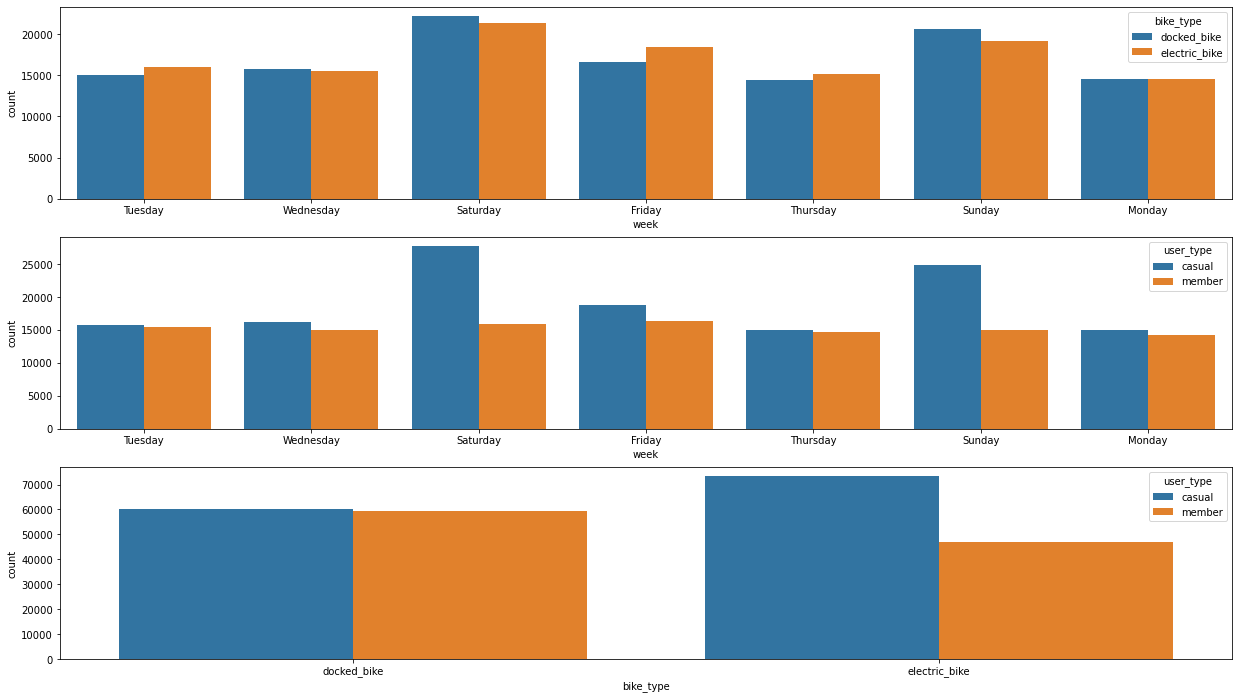

In [10]:
plt.figure(figsize = [21, 12]);

ax = plt.subplot(3, 1, 1)
sns.countplot(data = df, x = 'week', hue = 'bike_type');

ax = plt.subplot(3, 1, 2);
sns.countplot(data = df, x = 'week', hue = 'user_type');

ax = plt.subplot(3, 1, 3);

sns.countplot(data = df, x = 'bike_type', hue = 'user_type');

# Hourly usage of bike types and user types

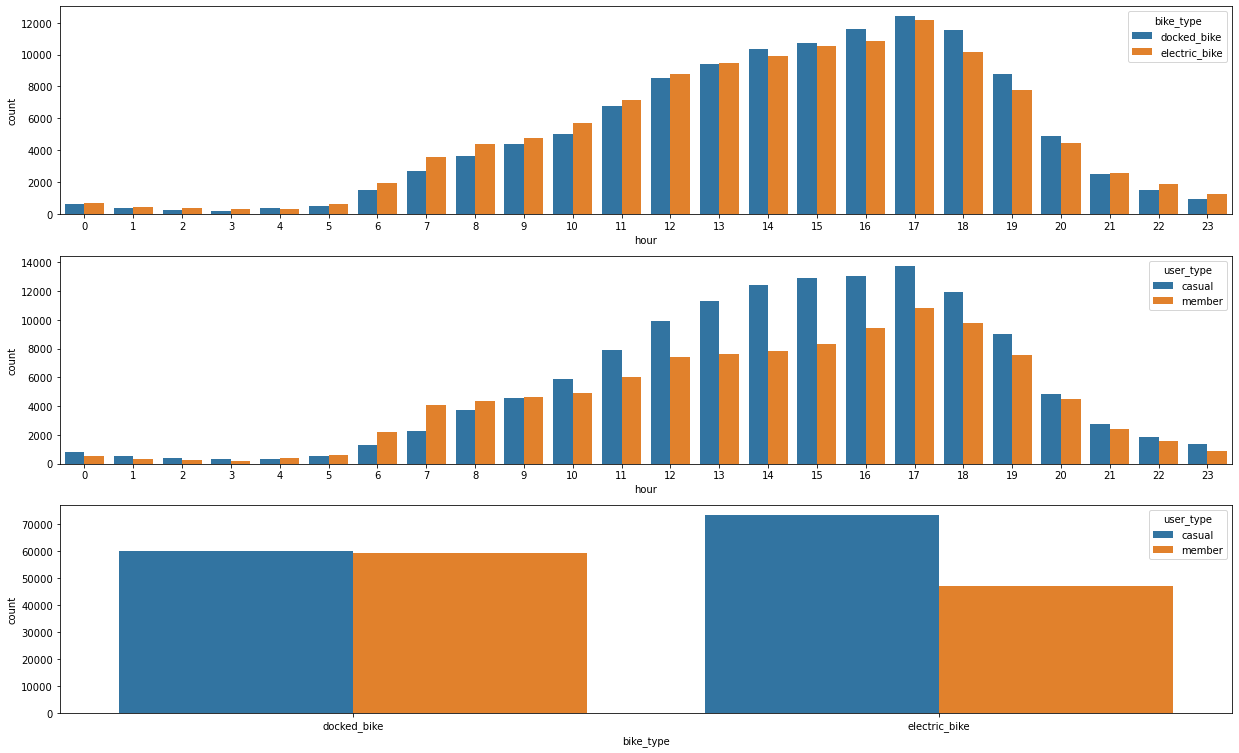

In [11]:
plt.figure(figsize = [21, 13]);

ax = plt.subplot(3, 1, 1)
sns.countplot(data = df, x = 'hour', hue = 'bike_type');

ax = plt.subplot(3, 1, 2);
sns.countplot(data = df, x = 'hour', hue = 'user_type');

ax = plt.subplot(3, 1, 3);

sns.countplot(data = df, x = 'bike_type', hue = 'user_type');

# Conclusion

* The data is pretty straight forward but some attributes work together to display a very conveying and intresting pattern in data and to learn the aspacts of business of Ford bike. I will list some of them below:

    1. Among casual and members of the system, casual bikers tend to drive for more duration than the members, which conveys 2 things, either the every day charge is less than membership or number of tourists are more than the people living in the city.

    2. Due the pandamic, most peak and busy hours/days are weekends during evening time. As most people work from home during week days. People tend to go out only on weekends for a short drive and short duration of time.

    3. During weekdays only evening hours are busy which shows people use ford bike as their commute to go to park or near by places.

    4. As the Data is limited to months of summer an increase in daily riders can be seen with the further months, which conveys that tourists places are opening, due which more and more tourists are coming and people are going out using the commute.
    
    5. Riders tend to use electric bike more than the docked bikes, amy be due to save time and effort as in order to spend lesser time outside the home, due to pandamic.